# Importar Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Carregar o Dataset

In [2]:
# import kaggle
# kaggle.api.dataset_download_files('muhammadshahidazeem/customer-churn-dataset', path='C:/Users/karen/Documents/karenjblab/analise-churn/data', unzip=True)

## Testing

In [3]:
df_testing0 = pd.read_csv("C:/Users/karen/Documents/karenjblab/analise-churn/data/customer_churn_dataset-testing-master.csv")  # Aqui a gente preenche com o nome do .csv

In [4]:
df_testing0.head()  # Exibe as primeiras 5 linhas

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
df_testing1 = df_testing0[['CustomerID'
                           ,'Age'
                           ,'Tenure'
                           ,'Usage Frequency'
                           ,'Support Calls'
                           ,'Payment Delay'
                           ,'Total Spend'
                           , 'Last Interaction'
                           , 'Churn']]

df_testing2 = df_testing0[['Gender'
                           ,'Subscription Type'
                           ,'Contract Length']]

df_testing = pd.concat([df_testing2, df_testing1], axis=1)

df_testing

,Gender,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,Female,Basic,Monthly,1,22,25,14,4,27,598,9,1
1,Female,Standard,Monthly,2,41,28,28,7,13,584,20,0
2,Male,Premium,Annual,3,47,27,10,2,29,757,21,0
3,Male,Premium,Quarterly,4,35,9,12,5,17,232,18,0
4,Female,Standard,Annual,5,53,58,24,9,2,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,Female,Basic,Quarterly,64370,45,33,12,6,21,947,14,1
64370,Male,Standard,Annual,64371,37,6,1,5,22,923,9,1
64371,Male,Premium,Monthly,64372,25,39,14,8,30,327,20,1
64372,Female,Standard,Monthly,64373,50,18,19,7,22,540,13,1


## Training

In [6]:
df_training = pd.read_csv("C:/Users/karen/Documents/karenjblab/analise-churn/data/customer_churn_dataset-training-master.csv")  # Aqui a gente preenche com o nome do .csv

In [7]:
df_training.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [8]:
df_training0 = df_training.dropna()

In [9]:
df_training1 = df_training0[['CustomerID'
                           ,'Age'
                           ,'Tenure'
                           ,'Usage Frequency'
                           ,'Support Calls'
                           ,'Payment Delay'
                           ,'Total Spend'
                           , 'Last Interaction'
                           , 'Churn']].astype(int)

df_training2 = df_training0[['Gender'
                           ,'Subscription Type'
                           ,'Contract Length']]

df_training = pd.concat([df_training2, df_training1], axis=1)

df_training

,Gender,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,Female,Standard,Annual,2,30,39,14,5,18,932,17,1
1,Female,Basic,Monthly,3,65,49,1,10,8,557,6,1
2,Female,Basic,Quarterly,4,55,14,4,6,18,185,3,1
3,Male,Standard,Monthly,5,58,38,21,7,7,396,29,1
4,Male,Basic,Monthly,6,23,32,20,5,8,617,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,Male,Premium,Annual,449995,42,54,15,1,3,716,8,0
440829,Female,Premium,Annual,449996,25,8,13,1,20,745,2,0
440830,Male,Standard,Quarterly,449997,26,35,27,1,5,977,9,0
440831,Male,Standard,Quarterly,449998,28,55,14,2,0,602,2,0


# Explorar os Dados

## Testing

### Informações gerais do dataset

In [10]:
print(df_testing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             64374 non-null  object
 1   Subscription Type  64374 non-null  object
 2   Contract Length    64374 non-null  object
 3   CustomerID         64374 non-null  int64 
 4   Age                64374 non-null  int64 
 5   Tenure             64374 non-null  int64 
 6   Usage Frequency    64374 non-null  int64 
 7   Support Calls      64374 non-null  int64 
 8   Payment Delay      64374 non-null  int64 
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None


### Contagem dos valores da variável alvo

In [11]:
print(df_testing["Churn"].value_counts())

Churn
0    33881
1    30493
Name: count, dtype: int64


### Visualizando a distribuição de Churn

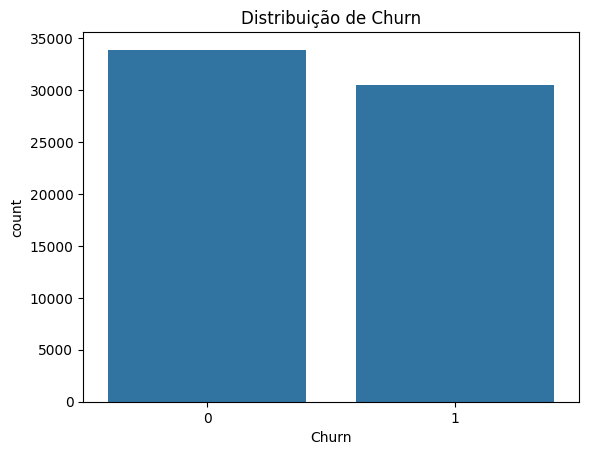

In [12]:
sns.countplot(data=df_testing, x="Churn"),
plt.title("Distribuição de Churn"),
plt.show()

## Training

In [13]:
### Informações gerais do dataset

In [14]:
print(df_training.info())

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Gender             440832 non-null  object
 1   Subscription Type  440832 non-null  object
 2   Contract Length    440832 non-null  object
 3   CustomerID         440832 non-null  int64 
 4   Age                440832 non-null  int64 
 5   Tenure             440832 non-null  int64 
 6   Usage Frequency    440832 non-null  int64 
 7   Support Calls      440832 non-null  int64 
 8   Payment Delay      440832 non-null  int64 
 9   Total Spend        440832 non-null  int64 
 10  Last Interaction   440832 non-null  int64 
 11  Churn              440832 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 43.7+ MB
None


In [15]:
### Contagem dos valores da variável alvo

In [16]:
print(df_training["Churn"].value_counts())

Churn
1    249999
0    190833
Name: count, dtype: int64


In [17]:
### Visualizando a distribuição de Churn

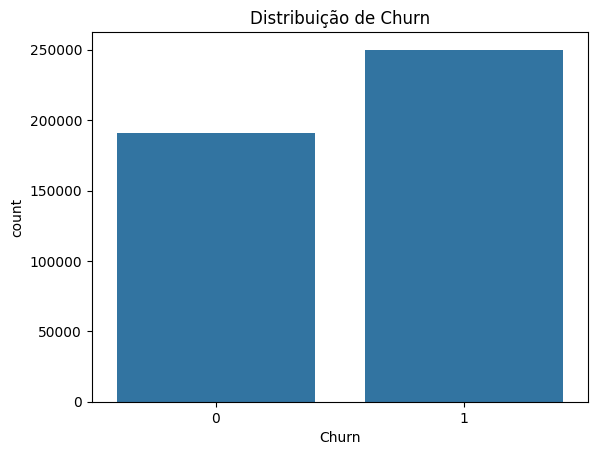

In [18]:
sns.countplot(data=df_training, x="Churn"),
plt.title("Distribuição de Churn"),
plt.show()

# Preparação dos Dados

## Testing

### Separando variáveis preditoras e alvo

In [19]:
X_testing = df_testing.drop(columns=["Churn"])
y_testing = df_testing["Churn"]

In [20]:
X_testing

,Gender,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,Female,Basic,Monthly,1,22,25,14,4,27,598,9
1,Female,Standard,Monthly,2,41,28,28,7,13,584,20
2,Male,Premium,Annual,3,47,27,10,2,29,757,21
3,Male,Premium,Quarterly,4,35,9,12,5,17,232,18
4,Female,Standard,Annual,5,53,58,24,9,2,533,18
...,...,...,...,...,...,...,...,...,...,...,...
64369,Female,Basic,Quarterly,64370,45,33,12,6,21,947,14
64370,Male,Standard,Annual,64371,37,6,1,5,22,923,9
64371,Male,Premium,Monthly,64372,25,39,14,8,30,327,20
64372,Female,Standard,Monthly,64373,50,18,19,7,22,540,13


In [21]:
gender_testing = pd.get_dummies(X_testing['Gender'], drop_first=True)

In [22]:
gender_testing

,Male
0,False
1,False
2,True
3,True
4,False
...,...
64369,False
64370,True
64371,True
64372,False


In [23]:
X_testing['Male'] = gender_testing['Male']

In [24]:
X_testing

,Gender,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Male
0,Female,Basic,Monthly,1,22,25,14,4,27,598,9,False
1,Female,Standard,Monthly,2,41,28,28,7,13,584,20,False
2,Male,Premium,Annual,3,47,27,10,2,29,757,21,True
3,Male,Premium,Quarterly,4,35,9,12,5,17,232,18,True
4,Female,Standard,Annual,5,53,58,24,9,2,533,18,False
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,Female,Basic,Quarterly,64370,45,33,12,6,21,947,14,False
64370,Male,Standard,Annual,64371,37,6,1,5,22,923,9,True
64371,Male,Premium,Monthly,64372,25,39,14,8,30,327,20,True
64372,Female,Standard,Monthly,64373,50,18,19,7,22,540,13,False


In [25]:
X_testing.drop(columns=['Gender'], inplace=True)

In [26]:
X_testing

,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Male
0,Basic,Monthly,1,22,25,14,4,27,598,9,False
1,Standard,Monthly,2,41,28,28,7,13,584,20,False
2,Premium,Annual,3,47,27,10,2,29,757,21,True
3,Premium,Quarterly,4,35,9,12,5,17,232,18,True
4,Standard,Annual,5,53,58,24,9,2,533,18,False
...,...,...,...,...,...,...,...,...,...,...,...
64369,Basic,Quarterly,64370,45,33,12,6,21,947,14,False
64370,Standard,Annual,64371,37,6,1,5,22,923,9,True
64371,Premium,Monthly,64372,25,39,14,8,30,327,20,True
64372,Standard,Monthly,64373,50,18,19,7,22,540,13,False


In [27]:
oe = OrdinalEncoder(categories=[['Basic', 'Standard', 'Premium']])

In [28]:
oe

OrdinalEncoder(categories=[['Basic', 'Standard', 'Premium']])

In [29]:
X_testing[['Subscription Type']] = oe.fit_transform(X_testing[['Subscription Type']]).astype(int)

In [30]:
X_testing

,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Male
0,0,Monthly,1,22,25,14,4,27,598,9,False
1,1,Monthly,2,41,28,28,7,13,584,20,False
2,2,Annual,3,47,27,10,2,29,757,21,True
3,2,Quarterly,4,35,9,12,5,17,232,18,True
4,1,Annual,5,53,58,24,9,2,533,18,False
...,...,...,...,...,...,...,...,...,...,...,...
64369,0,Quarterly,64370,45,33,12,6,21,947,14,False
64370,1,Annual,64371,37,6,1,5,22,923,9,True
64371,2,Monthly,64372,25,39,14,8,30,327,20,True
64372,1,Monthly,64373,50,18,19,7,22,540,13,False


In [31]:
oe = OrdinalEncoder(categories=[['Monthly', 'Quarterly', 'Annual']])

In [32]:
X_testing[['Contract Length']] = oe.fit_transform(X_testing[['Contract Length']]).astype(int)

In [33]:
X_testing

,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Male
0,0,0,1,22,25,14,4,27,598,9,False
1,1,0,2,41,28,28,7,13,584,20,False
2,2,2,3,47,27,10,2,29,757,21,True
3,2,1,4,35,9,12,5,17,232,18,True
4,1,2,5,53,58,24,9,2,533,18,False
...,...,...,...,...,...,...,...,...,...,...,...
64369,0,1,64370,45,33,12,6,21,947,14,False
64370,1,2,64371,37,6,1,5,22,923,9,True
64371,2,0,64372,25,39,14,8,30,327,20,True
64372,1,0,64373,50,18,19,7,22,540,13,False


## Training

### Separando variáveis preditoras e alvo

In [34]:
X_training = df_training.drop(columns=["Churn"])
y_training = df_training["Churn"]

In [35]:
X_training

,Gender,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,Female,Standard,Annual,2,30,39,14,5,18,932,17
1,Female,Basic,Monthly,3,65,49,1,10,8,557,6
2,Female,Basic,Quarterly,4,55,14,4,6,18,185,3
3,Male,Standard,Monthly,5,58,38,21,7,7,396,29
4,Male,Basic,Monthly,6,23,32,20,5,8,617,20
...,...,...,...,...,...,...,...,...,...,...,...
440828,Male,Premium,Annual,449995,42,54,15,1,3,716,8
440829,Female,Premium,Annual,449996,25,8,13,1,20,745,2
440830,Male,Standard,Quarterly,449997,26,35,27,1,5,977,9
440831,Male,Standard,Quarterly,449998,28,55,14,2,0,602,2


In [36]:
gender_training = pd.get_dummies(X_training['Gender'], drop_first=True)

In [37]:
gender_training

,Male
0,False
1,False
2,False
3,True
4,True
...,...
440828,True
440829,False
440830,True
440831,True


In [38]:
X_training['Male'] = gender_training['Male']

In [39]:
X_training = X_training.drop(columns=["Gender"])

In [40]:
X_training

,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Male
0,Standard,Annual,2,30,39,14,5,18,932,17,False
1,Basic,Monthly,3,65,49,1,10,8,557,6,False
2,Basic,Quarterly,4,55,14,4,6,18,185,3,False
3,Standard,Monthly,5,58,38,21,7,7,396,29,True
4,Basic,Monthly,6,23,32,20,5,8,617,20,True
...,...,...,...,...,...,...,...,...,...,...,...
440828,Premium,Annual,449995,42,54,15,1,3,716,8,True
440829,Premium,Annual,449996,25,8,13,1,20,745,2,False
440830,Standard,Quarterly,449997,26,35,27,1,5,977,9,True
440831,Standard,Quarterly,449998,28,55,14,2,0,602,2,True


In [41]:
oe = OrdinalEncoder(categories=[['Basic', 'Standard', 'Premium']])

In [42]:
X_training[['Subscription Type']] = oe.fit_transform(X_training[['Subscription Type']]).astype(int)

In [43]:
X_training

,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Male
0,1,Annual,2,30,39,14,5,18,932,17,False
1,0,Monthly,3,65,49,1,10,8,557,6,False
2,0,Quarterly,4,55,14,4,6,18,185,3,False
3,1,Monthly,5,58,38,21,7,7,396,29,True
4,0,Monthly,6,23,32,20,5,8,617,20,True
...,...,...,...,...,...,...,...,...,...,...,...
440828,2,Annual,449995,42,54,15,1,3,716,8,True
440829,2,Annual,449996,25,8,13,1,20,745,2,False
440830,1,Quarterly,449997,26,35,27,1,5,977,9,True
440831,1,Quarterly,449998,28,55,14,2,0,602,2,True


In [44]:
oe = OrdinalEncoder(categories=[['Monthly', 'Quarterly', 'Annual']])

In [45]:
X_training[['Contract Length']] = oe.fit_transform(X_training[['Contract Length']]).astype(int)

In [46]:
X_training

,Subscription Type,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Male
0,1,2,2,30,39,14,5,18,932,17,False
1,0,0,3,65,49,1,10,8,557,6,False
2,0,1,4,55,14,4,6,18,185,3,False
3,1,0,5,58,38,21,7,7,396,29,True
4,0,0,6,23,32,20,5,8,617,20,True
...,...,...,...,...,...,...,...,...,...,...,...
440828,2,2,449995,42,54,15,1,3,716,8,True
440829,2,2,449996,25,8,13,1,20,745,2,False
440830,1,1,449997,26,35,27,1,5,977,9,True
440831,1,1,449998,28,55,14,2,0,602,2,True


Uso StandardScaler para padronizar (ou normalizar) os dados de treinamento e teste. A padronização é uma técnica comum para preparar os dados antes de alimentar um modelo de Machine Learning. Ela visa garantir que todas as features tenham a mesma escala e distribuição.

## Padronizando os dados

O StandardScaler é uma técnica de normalização que transforma os dados para uma distribuição com média 0 e desvio padrão 1. Isso é útil porque muitos modelos de Machine Learning, especialmente aqueles baseados em distâncias (como KNN ou SVM), se saem melhor quando os dados estão padronizados.

In [47]:
scaler = StandardScaler()

Estou aplicando a padronização aos dados de treinamento X_trainning. O método fit_transform() faz duas coisas:

```fit():``` Calcula a média e o desvio padrão de cada feature (coluna) dos dados de treinamento.

```transform():``` Usa essas informações de média e desvio padrão para transformar os dados, fazendo com que cada feature tenha média 0 e desvio padrão 1.

In [48]:
X_training = scaler.fit_transform(X_training)

Não uso ```fit_transform()``` aqui, porque quero que os dados de teste sejam transformados da mesma maneira que os dados de treinamento, ou seja, usando a mesma média e desvio padrão calculados no fit() de X_train. Isso evita que o modelo tenha "informações privilegiadas" dos dados de teste, o que poderia viciar o modelo.



In [49]:
X_testing = scaler.transform(X_testing)

# Treinando o Modelo

## Descobrir qual é a quantidade ideal de árvores para criar o modelo com o Grid Search

Utilizar esse código caso os parâmetros comuns estiverem resultados em uma acurácia de 1.00, o que pode significar um overfitting dos dados (a a máquina entende além do que deveria e acaba gerando enganos, como por exemplo, prever comportamentos mais parecidos com o que a maioria faz do que a previsão real do que pode ocorrer.

In [50]:
# from sklearn.model_selection import GridSearchCV

# # Definir o modelo
# rf = RandomForestClassifier(random_state=42)

# # Parâmetros para o GridSearch
# param_grid = {
#     'n_estimators': [100, 200, 300, 500, 1000],  # Testando diferentes números de árvores
#     'max_depth': [None, 10, 20],  # Ajuste para a profundidade das árvores
#     'min_samples_split': [2, 5, 10],  # Número mínimo de amostras por divisão
#     'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras por folha
# }

# # Definindo o GridSearchCV
# grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_training, y_training)

# # Melhor número de árvores encontrado
# print("Melhor número de árvores:", grid_search.best_params_['n_estimators'])

## Criando e treinando um modelo Random Forest

Criei um objeto do modelo ```RandomForestClassifier()``` e vou treinar ele com os dados de treinamento X_train e as labels correspondentes y_train.

In [67]:
model = RandomForestClassifier(n_estimators=200 # Número de Árvores
                               , random_state=42 # Qualquer número para manter as amostras sempre as mesmas
                               , max_depth=6 # Profundidade máxima de cada árvore
                               # , class_weight='balanced' 
                               , min_samples_split = 20
                               , min_samples_leaf=10
                               , max_features=0.5# Considera metade das features por nó para maior generalização
                              )

O método ```fit()``` é onde o modelo aprende a relação entre as features (dados) e a variável alvo (y_train).

In [53]:
model.fit(X_training, y_training)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)

In [54]:
y_pred = model.predict(X_testing)

# Avaliação do Modelo

Depois de treinar o modelo, quero saber o quanto ele é bom em fazer previsões. 

Uma das formas de avaliar a performance do modelo é usar a acurácia.

In [57]:
accuracy = accuracy_score(y_testing, y_pred)
print(f"Acurácia do Modelo: {accuracy:.2f}")

Acurácia do Modelo: 0.50


## Relatório de Classificação

In [58]:
print("\nRelatório de Classificação:")
print(classification_report(y_testing, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08     33881
           1       0.48      1.00      0.65     30493

    accuracy                           0.50     64374
   macro avg       0.74      0.52      0.37     64374
weighted avg       0.75      0.50      0.35     64374



## Matriz de Confusão

Aqui estamos considerando o padrão de 0.5 de nível de confiança

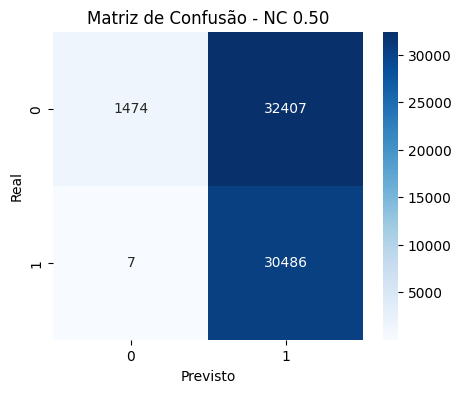

In [59]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_testing, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - NC 0.50")
plt.show()

Aqui aumentamos o nível de confiança para 0.55

In [ ]:
y_probs = model.predict_proba(X_testing)[:, 1]  # Pegando probabilidade de churn

In [ ]:
y_pred_adjusted = (y_probs > 0.55).astype(int)  # Subindo threshold para 0.55

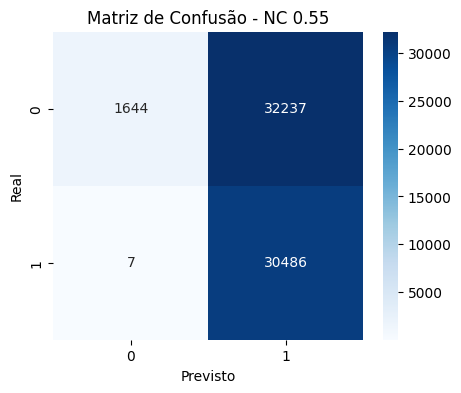

In [60]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_testing, y_pred_adjusted), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - NC 0.55")
plt.show()

In [61]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_pred_adjusted))

# Resumo do Problema, Análise do Modelo e Interpretação dos Resultados

A base de treinamento tem desbalanceamento, 57% de churn e a base de teste tem 47% de churn, portanto o modelo está impelido de prever o que é churn mas de não saber identificar o que não é churn.

## Novo teste para resolução do problema

Precisaremos balancear os dados, portanto farei um Oversamplin utilizando o SMOT, pois o Undersampling, apesar de reduzir a classe majoritária na base de treino também pode fazer com que ela perca dados e o SMOTE cria dados sintéticos com novos exemplos da classe minoritária.

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_training, y_training)


In [69]:
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=6, max_features=0.5, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, random_state=42)

In [70]:
y_pred_resampled = model.predict(X_testing)

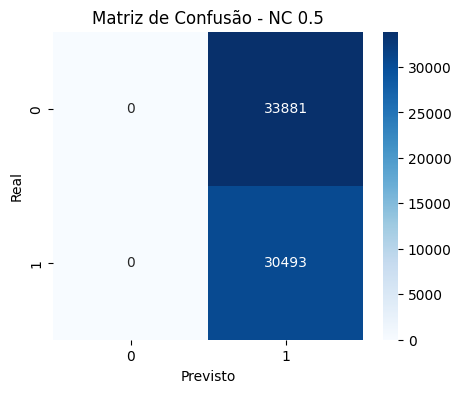

In [71]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_testing, y_pred_resampled), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - NC 0.5")
plt.show()